<a href="https://colab.research.google.com/github/Abhay-07082005/ai-good-detector/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Dataset .csv to Dataset .csv


In [7]:
import os
os.rename("Dataset .csv", "Dataset.csv")
df = pd.read_csv("Dataset.csv")
print(df.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv("Dataset.csv")
print(df.head())
print(df.info())
print(df.describe())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [18]:
print(df.isnull().sum())
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


Restaurant ID            0
Country Code             0
Longitude                0
Latitude                 0
Average Cost for two     0
                        ..
Rating text_Excellent    0
Rating text_Good         0
Rating text_Not rated    0
Rating text_Poor         0
Rating text_Very Good    0
Length: 20830, dtype: int64


/tmp/ipython-input-1950672656.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [20]:

le = LabelEncoder()
for col in cat_cols:
    if df[col].nunique() <= 2:
        df[col] = le.fit_transform(df[col])
df = pd.get_dummies(df, columns=[col for col in cat_cols if df[col].nunique() > 2], drop_first=True)


In [21]:
target='Aggregate rating'
X=df.drop(target, axis=1)
y=df[target]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Metrics:
MSE: 0.09198837526097209
R2 Score: 0.9595852502438978


In [23]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Metrics:
MSE: 0.04880690737833594
R2 Score: 0.9785568671860043


                                                 Feature    Importance
10                                                 Votes  8.989552e-01
20820                                Rating color_Orange  5.152611e-02
20827                                   Rating text_Poor  2.219755e-02
20825                                   Rating text_Good  1.308405e-02
20824                              Rating text_Excellent  2.579984e-03
...                                                  ...           ...
7092                 Restaurant Name_Urban Crave Express  0.000000e+00
7091                     Restaurant Name_Urban Chopstick  0.000000e+00
7069               Restaurant Name_Uncultured Cafe & Bar  0.000000e+00
535                                  Restaurant Name_BTW -3.026492e-19
18967  Locality Verbose_Worldmark 1, Aerocity, New Delhi -1.614129e-18

[20829 rows x 2 columns]


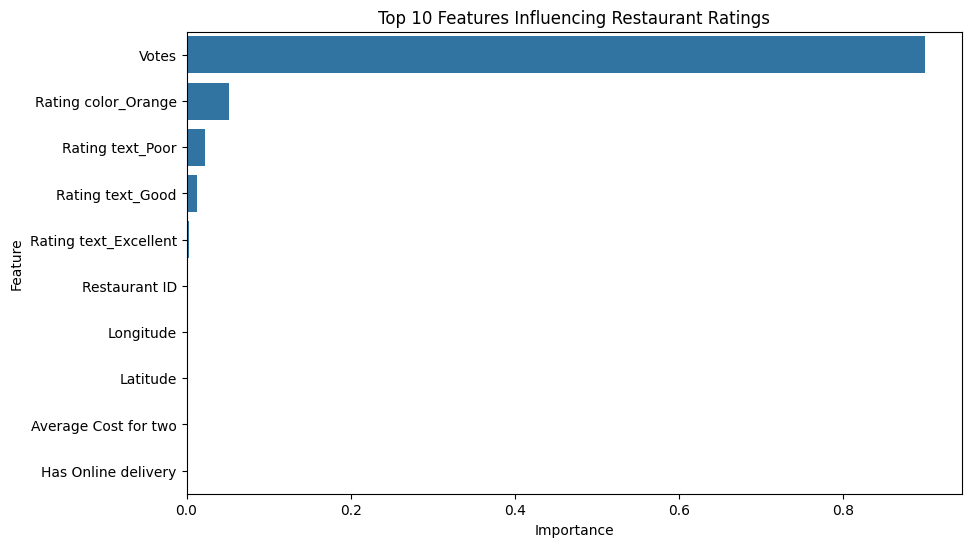

In [24]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Features Influencing Restaurant Ratings")
plt.show()
